In [13]:
"""
Implementation of the Couette Flow 
"""
from LB import LB 
from boundaries import * 
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

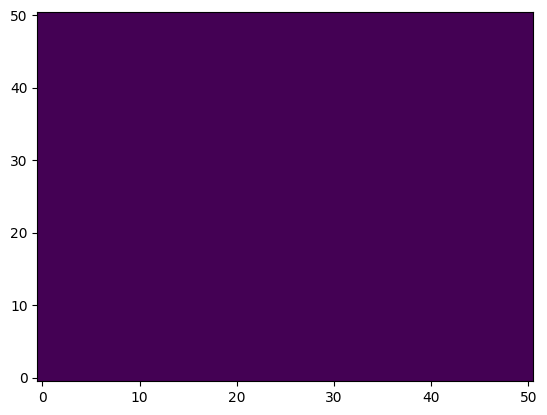

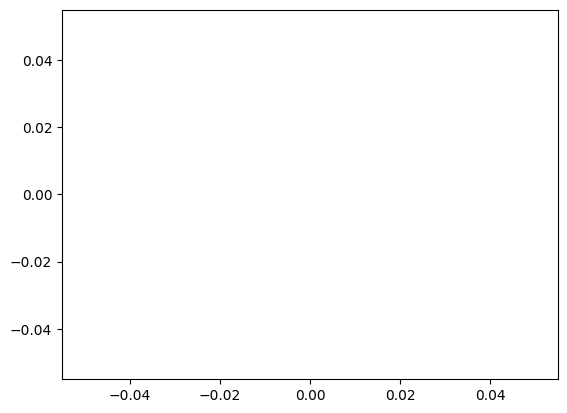

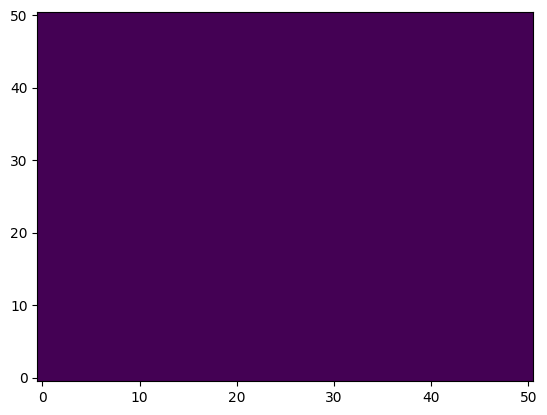

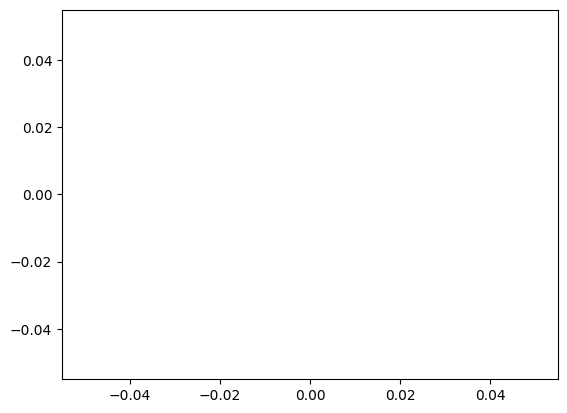

In [14]:
lb = LB()
lb.omega = 1
lb.fitParams()

# wall velocity
wallVelocity = 0.1
wvarr = [0.0, wallVelocity]
y = np.arange(lb.Ny)
analyticalVelocity = (lb.Ny-1 - y) / (lb.Ny-1) * wvarr[1] 

In [15]:
# lb.F[5,5,5] = 10
# lb.F[30,6,1] = 10
# lb.F[25,2,7] = 10
# lb.F[25,45,3] = 10
# lb.fitParams()

def simulate(timesteps=1000, showDensityPlot=True, showVelocityPlot=True, SAVE_EVERY=1):  

  # boundaries to apply to the simulation 
  boundaries = []
  boundaries.append(BottomWallBoundary(lb))
  boundaries.append(MovingTopWallBoundary(lb, wallVelocity))

  fig, ax = plt.subplots()
  fig2, ax2 = plt.subplots()
  figs, axes = [fig, fig2], [ax, ax2]

  for i in range(timesteps):

    # boundaries caching values before streaming 
    for boundary in boundaries: 
      boundary.before()

    # apply drift/stream
    lb.streaming()

    # Recalc local variables 
    lb.calculateDensity()
    lb.calculateVelocity()

    # apply collision
    lb.collision()

    for boundary in boundaries: 
      boundary.after()
  
    if showDensityPlot:
      if i % SAVE_EVERY == 0:
          lb.updateDensityFigure(lb.rho, timestep = i)
          display.display(lb.densityFig)
          display.clear_output(wait=True)
          
    if showVelocityPlot:
      if i % SAVE_EVERY == 0:
        lb.updateVelocityFigure(lb.ux, lb.uy, timestep = i)
        display.display(lb.velocityFig)
        display.clear_output(wait=True)

    if i % SAVE_EVERY == 0:
      axes[0].cla()
      axes[0].set_xlim([-0.01, wallVelocity])
      axes[0].axhline(0.0, color='k')
      axes[0].axhline(lb.Ny-1, color='r')
      axes[0].plot(lb.ux[:,lb.Nx//2], y)
      axes[0].plot(analyticalVelocity, y)
      axes[0].set_ylabel('y')
      axes[0].set_xlabel('velocity')
      axes[0].legend(['Moving Wall', 'Rigid Wall',
                      'Simulated Velocity', 'Analytical Velocity'])
      figs[0].savefig(f"./plots/couette_flow/img_{i}", bbox_inches='tight', pad_inches=0)



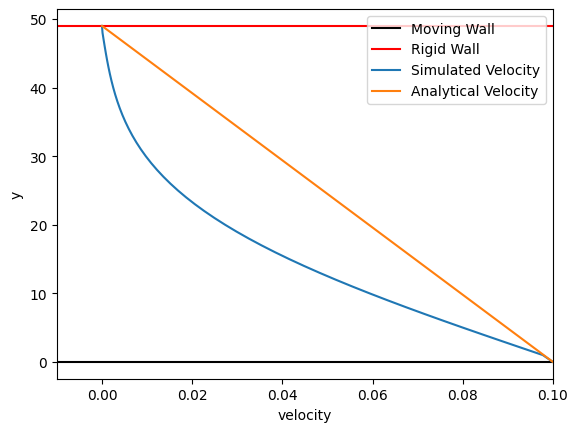

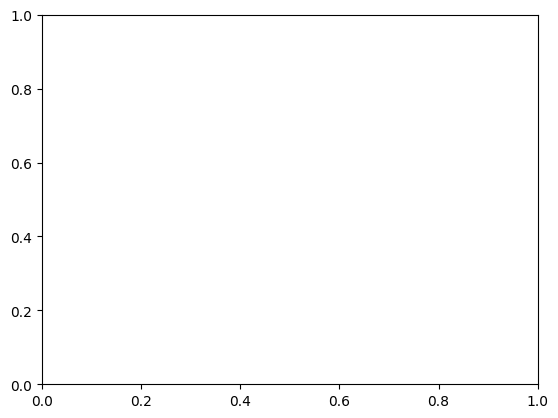

In [16]:
simulate(timesteps=1000, showDensityPlot = False, showVelocityPlot = True, SAVE_EVERY=50)